We will plot a invariant mass distribution from a LHE input file.

First, some basic imports.

In [1]:
import math

import hist

import pylhe

Prepare a histogram and a function to calculate the invariant mass of two particles.

In [18]:
h = hist.Hist.new.Reg(30, 50, 150).Int64()

In [19]:
def invariant_mass(p1, p2):
    return math.sqrt(
        sum(
            (1 if mu == "e" else -1) * (getattr(p1, mu) + getattr(p2, mu)) ** 2
            for mu in ["e", "px", "py", "pz"]
        )
    )

Use the generator provided by pylhe to read the events.

In [20]:
for e in pylhe.readLHE("./unweighted_events.lhe"):
    h.fill(invariant_mass(e.particles[-1], e.particles[-2]), weight=e.eventinfo.weight)
h

Hist(Regular(30, 50, 150, label='Axis 0'), storage=Int64()) # Sum: 13189080.0 (16780000.0 with flow)

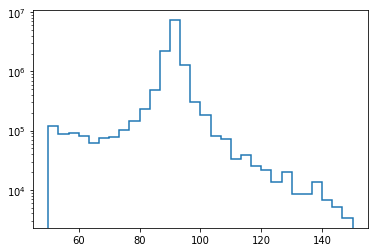

In [22]:
a = h.plot1d()
a[0].stairs.axes.set_yscale("log")

In [25]:
import itertools

events = pylhe.readLHE("./unweighted_events.lhe")
for i, e in enumerate(itertools.islice(events, 0, 2)):
    filename = f"event{i}.pdf"
    pylhe.visualize(e, filename)

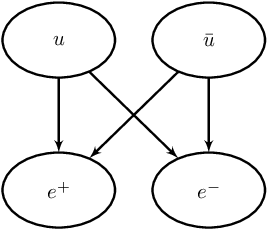

In [30]:
import wand.image

wand.image.Image(filename="event0.pdf", resolution=150)

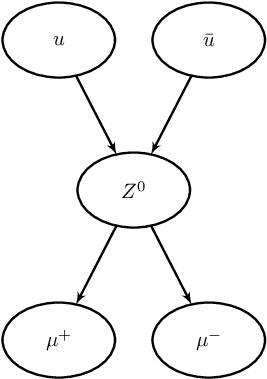

In [31]:
wand.image.Image(filename="event1.pdf", resolution=150)